In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

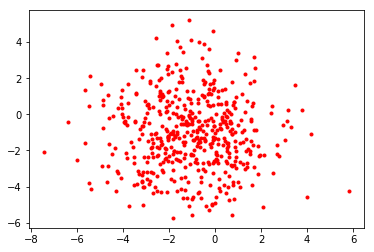

In [2]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [3]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)

1) What is our state?

2) How do we **move** from existing state to the next?

3) How do we decide whether to keep it or not?

4) Now find those three points.

In [31]:
def ranPoint():
    p1 = np.random.randint(500)
    p2 = np.random.randint(500)
    p3 = np.random.randint(500)
    return [(x[p1],y[p1]), (x[p2],y[p2]), (x[p3],y[p3])]


In [45]:
gps = ranPoint()
guess = triarea2(gps)

for i in range(5000):
    changeP = np.random.randint(3)
    change_i = np.random.randint(500)
    ps = np.copy(gps)
    ps[changeP] = (x[change_i], y[change_i])
    new = triarea2(ps)
    
    if (new > guess):
        guess = new
        gps = np.copy(ps)
    

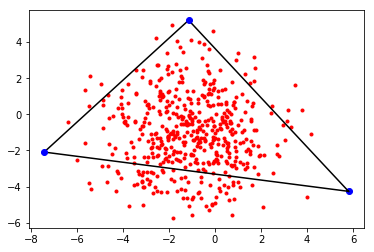

In [53]:
plt.plot(x,y,'.r')
px, py = gps[0]
plt.plot(px,py,"ob")
plt.plot([gps[0][0],gps[1][0],gps[2][0],gps[0][0]], [gps[0][1],gps[1][1],gps[2][1],gps[0][1]],color = 'black' )
px, py = gps[1]
plt.plot(px,py,"ob")
px, py = gps[2]
plt.plot(px,py,"ob")



### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 48  0 ..., 70  0 58]
 [48  0 24 ..., 45 42  0]
 [ 0 24  0 ..., 40 45 24]
 ..., 
 [70 45 40 ...,  0 36 46]
 [ 0 42 45 ..., 36  0 25]
 [58  0 24 ..., 46 25  0]]


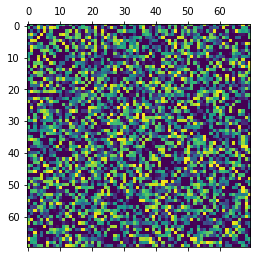

In [30]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))
# student[i,j] = how many students take both subject i, j
np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print(student)

plt.matshow(student)

1) How should we represent our state?

In [55]:
#index represent th subject.
# minimize the conflict
# count conflict in the current schdual.

2) What is our cost function

In [ ]:
# conflict function.

3) How do we move?

Now implement it.

4) Will this algorithm give you global minimum?

In [76]:
def conflict(schu,student = student):
    c = 0
    n = len(schu)
    for sj1 in range(n):
        for sj2 in range(sj1+1,n):
            if schu[sj1] == schu[sj2]: 
                c+=student[sj1][sj2]
    return c

In [72]:
def findSchdual(schu):
    new_schu = np.copy(schu)
    c_class = np.random.randint(70)
    c_timeslot = np.random.randint(15)
    new_schu[c_class] = c_timeslot
    return new_schu

In [84]:
b_schu = [np.random.randint(15) for i in range(70)] 
for i in range(10000):
    new_s = findSchdual(b_schu)
    if (conflict(new_s,student) < conflict(b_schu,student)):
        b_schu = np.copy(new_s)
        
    

In [85]:
print(b_schu)
print()
print(conflict(b_schu))

[ 8  7  8 11  2 13 13 10  8  2  5  7 13  4  8  0  4 10 12  6  6  9 11 12 14
  0  5 14 11  7  4  2  1  6  1  9  3 13 10 11  4 13  1  0  3  5 11 12  0  3
  0  9 10  6  5 14  3  9  1  8  1  4  5  3 14 12  7  0  2 14]

297


### Automatic Label Placement

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np
from math import sqrt, exp
from exceptions import NotImplementedError
import random
import io
import sys

In [ ]:
im = mpimg.imread('USnoState.png');
x, y = len(im[0]), len(im)
dpi = 96
plt.figure(figsize=(x/dpi,y/dpi))
plt.imshow(im, aspect = 'auto')

In [ ]:
def read_loc_data(fname):
    ret = {}
    with open(fname,'r') as f:
        for line in f:
            s = line.strip().split()
            x,y,state = s[0], s[1], ' '.join(s[2:])
            ret[state] = (int(x),int(y))
    return ret

tpl_loc = read_loc_data('PixelState.txt')
print tpl_loc

In [ ]:
def display_loc(im, tpl_loc, prp_loc, dpi=96, fontsize=16, bbox = False):
    #display map with text then return map of width and height for each state
    bboxes = {}
    x, y = len(im[0]), len(im)
    im = mpimg.imread('USnoState.png');
    print im.shape
    fig = plt.figure(figsize=(x/dpi,y/dpi))
    plt.imshow(im)
    texts = {}
    for state, (locx,locy) in prp_loc.iteritems():
        t = plt.text(locx, locy, state, ha='left', va='baseline', fontsize=fontsize)
        tx, ty = tpl_loc[state]
        
        plt.plot([tx,],[ty],'kx')
        
        texts[state] = t

    plt.draw()
    plt.xlim(0,1600)
    plt.ylim(989,0)
    renderer = fig.canvas.get_renderer()
    for state, t in texts.iteritems():
        transf = plt.gca().transData.inverted()
        bb = t.get_window_extent(renderer)
        bbd = bb.transformed(transf)
        if bbox:
            rect1 = mpl.patches.Rectangle([bbd.x0, bbd.y0], bbd.width, bbd.height, color='yellow')
            plt.gca().add_patch(rect1)
        bboxes[state] = abs(bbd.width), abs(bbd.height)
    
    for state, (locx,locy) in prp_loc.iteritems():
        tx, ty = tpl_loc[state]
        plt.plot([tx,locx+bboxes[state][0]/2.],[ty, locy],'k-')
    plt.draw()

    return bboxes
wh = display_loc(im, tpl_loc, tpl_loc, bbox=True)

In [ ]:
print wh

In [ ]:
def is_out_of_bound(x, y, w, h, im_w, im_h):
    #test whether a box with lower left baseline at x,y
    #with widght and height of w,h is out of the bound for im_size(im_w,im_h)
    return x<0 or y<0 or x+w>im_w or y+h>im_h
    
def distance(x0, y0, x1, y1):
    #return the euclidean distance of (loc_x, loc_y), (x, y)
    return (x0-x1)**2 + (y0-y1)**2

def is_overlapped(x0, y0, w0, h0, x1, y1, w1, h1):
    #check whether two rectangular overlaps
    #Think about why this works
    ox = x0<=x1<=x0+w0 or x0<=x1+w1<=x0+w0 or x1<=x0<=x1+w1 or x1<=x0+w0<=x1+w1
    oy = y0<=y1<=y0+h0 or y0<=y1+h1<=y0+h0 or y1<=y0<=y1+h1 or y1<=y0+h0<=y1+h1
    return ox and oy

def overlap_area(x0, y0, w0, h0, x1, y1, w1, h1):
    #return the overlap area of the rectangles
    #one with lower left corner at x0,y0 and witdth and height of w0 and h0
    #another with lower left corner at x1,y1 and width and height of w1 and h1
    
    if is_overlapped(x0, y0, w0, h0, x1, y1, w1, h1):
        xs = [x0, x0+w0, x1, x1+w1]
        ys = [y0, y0+h0, y1, y1+h1]
        xs.sort()
        ys.sort()
        return (xs[2] - xs[1])*(ys[2] - ys[1])
    else:
        return 0.

def line_intersect_box(x0, y0, x1, y1, xb, yb, w, h):
    #check whether line from x0,y0 to x1, y1
    #intersects with box defined by xb,yb, w,h
    box_overlap = is_overlapped(x0, y0, x1-x0, y1-y0, xb, yb, w, h)
    if box_overlap:
        if y0==y1 or x0==x1:
            return True
        else: 
            m = float(y0-y1)/(x0-x1)
            c = y0-m*x0
            yxt = m*(xb+w) + c
            yxb = m*(xb) + c
            xyt = (yb+h-c)/m
            xyb = (yb-c)/m
            return yb<yxt<yb+h or yb<yxb<yb+h or xb<xyt<xb+w or xb<xyb<xb+w
    return False

1) What indicates good labeling?

2) What indicates bad labeling?

3) So... what should the cost function look like for 1 label?

4) What should the cost function look like for many labels?

5) Write the cost function.

6) Write hill climbing. See spoiler at the end of the notebook

# Basic ODE (Not on final since it's not on hw)

Let us consider a problem of launching a spaceship to the moon.

In [ ]:
#earth at 0,0 with radius of 6400m
#moon 

r_e = 6371e3 #meter
d_em = 4*r_e#384400e3 #meter
r_m = 1737e3 #meter
G = 6.67e-11 #SI
m_e = 5.972e24 #kg
m_m = m_e #7e22 #kg

def axay(x,y):
    theta_earth = math.atan2(y, x)
    r_to_earth = math.sqrt(x**2 + y**2)

    x_to_moon = x-d_em
    y_to_moon = y
    theta_moon = math.atan2(y_to_moon, x_to_moon)
    r_to_moon = math.sqrt(x_to_moon**2+ y_to_moon**2)
    
    a_earth = -G*m_e/r_to_earth**2
    a_moon = -G*m_m/r_to_moon**2
    
    ax = a_earth*math.cos(theta_earth) + a_moon*math.cos(theta_moon)
    ay = a_earth*math.sin(theta_earth) + a_moon*math.sin(theta_moon)
    return ax,ay

def half_step(x,y,vx,vy,dt):
    
    ax, ay = axay(x,y)
    
    x_half = x+vx*dt/2.
    y_half = y+vy*dt/2.
    
    vx_half = vx+ax*dt/2.
    vy_half = vy+ay*dt/2.
    
    x = x+vx_half*dt
    y = y+vy_half*dt
    
    ax_half,ay_half = axay(x_half, y_half)
    vx = vx + ax_half*dt
    vy = vy + ay_half*dt
    
    return x,y,vx,vy
    
    
    
def shoot_rocket():
    r_e = 6371e3 #meter
    d_em = 4*r_e#384400e3 #meter
    r_m = 1737e3 #meter
    G = 6.67e-11 #SI
    m_e = 5.972e24 #kg
    m_m = m_e #7e22 #kg

    x = 0
    y = r_e
    vx = 5800. #5500
    vy = 5800. #5500
    t=0.
    dt = 1. #second

    xs = []
    ys = []
    ts = []

    xs.append(x)
    ys.append(y)
    ts.append(t)

    for i in range(100000):

        ax,ay = axay(x,y)

        x = x + vx*dt
        y = y + vy*dt
        vx = vx + ax*dt
        vy = vy + ay*dt

        #x,y,vx,vy = half_step(x,y,vx,vy,dt)
        t = t + dt
        xs.append(x)
        ys.append(y)
        ts.append(t)
        #if i%1000==0:
            #print theta_earth, ay
    return xs,ys,ts


In [ ]:
xs,ys,ts = shoot_rocket()

In [ ]:
from JSAnimation import IPython_display
from matplotlib import animation
import IPython.display as display

#xs = np.linspace(1,5000e3,500)
#ys = np.linspace(1,10000e3,500)
#t = np.linspace(1,1000,500)

def animate_xy(xs,ys,t,sec):
    fig = plt.figure(figsize=(10,4), )
    line, = plt.plot([],[])
    point, = plt.plot([],[],'or')
    an = np.linspace(0, 2*np.pi, 100)
    earth, = plt.plot(r_e*np.cos(an), r_e*np.sin(an), 'g')
    moon, = plt.plot(d_em+r_m*np.cos(an), r_m*np.sin(an), 'k')
    text = plt.text(0,0, "Hey")
    plt.axes().set_aspect('equal')
    fps = 10
    interval = 1./fps
    nframes = int(fps*sec)
    plt.ylim(-4*r_e,4*r_e)
    def init():
        return []
    def animate(frameno):
        index = int((len(xs)-1.)*frameno/nframes)
        #print index
        point.set_data([xs[index]], [ys[index]])
        line.set_data(xs[:index], ys[:index])
        text.set_text(str(ts[index]))
        return [point, line, text]
    
    animate(0)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                frames=nframes, interval=interval, blit=True)
    print interval, nframes
    display.display_html(anim)

In [ ]:
animate_xy(xs,ys,ts,20)

#Spoiler

In [ ]:
def costfunc(tpl_loc, prp_loc, wh, im):
    #cost function to minimize
    #we want 3 things:
    #the center of the text should be as close as possible to the tpl_loc
    #Overlapping should be heavily penalized
    #Out of bound is really bad should also be heavily penalized
    #tpl_loc is where the center of the text really should be at
    #prp_loc is the proposed location
    #wh is the map of state -> width and height of text required
    #im_size is the (width, height) of the image
    #it should return a cost
    
    cost = 0 #remember low cost = goood, high cost = bad
    im_w, im_h = len(im[0]), len(im)
    #first sum up the distance between each label and template location
    dist_cost = 0
    for state, (x,y) in prp_loc.iteritems():       
        tplx, tply = tpl_loc[state]
        w, h = wh[state]
        #implement this
        dist_cost += distance(x+w/2., y+h/2., tplx, tply)
        
    #now penalize overlap
    overlap_penalty = 0
    states = prp_loc.keys()
    nstates = len(states)
    for i in range(nstates):
        for j in range(i+1, nstates):            
            x1, y1 = prp_loc[states[i]]
            w1, h1 = wh[states[i]]
            x2, y2 = prp_loc[states[j]]
            w2, h2 = wh[states[j]]
            #check the boxes
            if is_overlapped(x1, y1, w1, h1, x2, y2, w2, h2):
                overlap_penalty += 1e3*overlap_area(x1, y1, w1, h1, x2, y2, w2, h2)
    
#     intersect_penalty = 0
#     #check the line and box
#     for i in range(nstates):
#         for j in range(nstates):            
#             if i!=j:
#                 x1, y1 = prp_loc[states[i]] #line
#                 tplx, tply = tpl_loc[states[i]] #line
#                 xb, yb = prp_loc[states[j]] #box
#                 w, h = wh[states[j]]      #box  
#                 if line_intersect_box(x1, y1, tplx, tply, xb, yb, w, h):
#                     intersect_penalty += 1e4

    ob_penalty = 0
    for state, (x,y) in prp_loc.iteritems():
        #implement this
        w, h = wh[state]
        if is_out_of_bound(x, y, w, h, im_w, im_h):
            ob_penalty+=5e6
    
    #extra cost what ever that makes sense
    extra_cost = 0
    plt.xlim(0,x)
    plt.ylim(y,0)
    cost = dist_cost + overlap_penalty + ob_penalty #+ intersect_penalty
    
    return float(cost)

In [ ]:
def new_location(loc, delta_x, delta_y):
    ret = loc.copy()
    #for state, (x,y) in loc.iteritems():
    states = loc.keys()
    state = states[random.randint(0, len(states)-1)]
    #state='South Dakota'
    dx = random.randint(-delta_x, delta_x)
    dy = random.randint(-delta_y, delta_y)
    x,y = loc[state]
    ret[state] = (x+dx, y+dy)
        #print dx, dy
        #print state
    return ret

In [ ]:
def hill_climibing(start, tpl_loc , nloop, maxmove):
    print 'Start Hill Climbing'
    old_loc = start.copy()
    old_cost = costfunc(tpl_loc, old_loc, wh, im)
    start_cost = old_cost
    iupdate = 0
    for i in xrange(nloop):
        new_loc = new_location(old_loc, maxmove, maxmove)
        new_cost = costfunc(tpl_loc, new_loc, wh, im)
        if i%1000 == 0 : print 'At %d: cost %f'%(i,old_cost)
        if new_cost < old_cost:
            iupdate +=1
            old_loc = new_loc
            old_cost = new_cost
    print '%d Iteration, %d updates, %f -> %f'%(nloop, iupdate, start_cost, old_cost)
    return old_loc

In [ ]:
tmp = hill_climibing(tpl_loc, tpl_loc, 20000, 200)
display_loc(im, tpl_loc, tmp)